# Machine Learning Project - Predicting Housing Price In Ames, Iowa

> We have the duty of **formulating**, of **summarizing**, and of **communicating our conclusions**, in intelligible form, in recognition of the right of other free minds to utilize them in making their own decisions.
>
> --_Ronald Fisher_

This Jupyter notebook incorporates exploratory data analysis, the process of dropping variables/columns, data imputation. The main objective is to get a general sense of the data, perform part of the feature engineering and data transformation.

<a id='top'></a>
## Table of Contents

* [1. Exploratory Data Analysis](#EDA)
 * [1.0 Dataframe Overview](#Overview)
 * [1.1 Missingness](#Missingness)
 * [1.2 Inbalances](#Inbalance)
 * [1.3 Correlation Check](#Correlation)
* [2. Exploring Variables](#Variable_Exploration)
 * [2.1 Take a look at SalePrice](#SalePrice)





<a id='EDA'></a>

## 1. Exploratory Data Analysis

<a id='Overview'></a>

### 1.0 Dataframe Overview

In [1]:
# Import Data Analysis Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 80)

In [2]:
# Import Data
filePath  = './data/'
df_train = pd.read_csv(filePath + "train.csv")
df_test = pd.read_csv(filePath + "test.csv")

In [3]:
print(df_train.shape) # training dataframe contains 1460 observations with 81 variables, including SalePrice
print(df_test.shape)  # test dataframe contains 1459 observations with 80 variables

(1460, 81)
(1459, 80)


In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_train.dtypes.value_counts() 
# Out of 81 variables, we have 43 categorical/qualitative variables, 38 quantitative variables

object     43
int64      35
float64     3
dtype: int64

In [7]:
# list of categorical variables
obj_list = list(df_train.columns[df_train.dtypes == 'object'])
print(obj_list)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [8]:
# list of quantitative variables Id/Saleprice would be need to be removed later 
num_list = list(df_train.columns[df_train.dtypes != 'object'])
num_list.remove('Id')
print(num_list)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [9]:
# df_train[num_list].describe()

[Back To Top](#top)

<a id='Missingness'></a>
### 1.1 Missingness

In [10]:
# Overall Missingness
total_nan = df_train.isnull().sum().sum()
print("Total NaN in Dataframe: " , total_nan)
print("Percent Missingness in Dataframe: ", 100*total_nan/(len(df_train.index)*len(df_train.columns)))

Total NaN in Dataframe:  6965
Percent Missingness in Dataframe:  5.889565364451209


In [11]:
# Missingness of categorical variables
obj_miss_percent = {}
for i in range(len(obj_list)):
#     print('-'*55)
#     print(df_train[obj_list[i]].value_counts())
    missing_value = df_train[obj_list[i]].isnull().sum()
    missing_percentage = missing_value/len(df_train)
    obj_miss_percent[obj_list[i]] = missing_percentage
#     print('Number of missing values in %s is %d'%(obj_list[i], missing_value))
#     print('Percentage of missing values for %s is %.2f'%(obj_list[i], missing_percentage))

In [12]:
# Missingness of numerical variables
num_miss_percent = {}
for i in range(len(num_list)):
#     print('-'*55)
#     print(df_train[num_list[i]].value_counts())
    missing_value = df_train[num_list[i]].isnull().sum()
    missing_percentage = missing_value/len(df_train)
    num_miss_percent[num_list[i]] =  missing_percentage
#     print('Number of missing values in %s is %d'%(num_list[i], missing_value))
#     print('Percentage of missing values for %s is %.2f'%(num_list[i], missing_percentage))

In [18]:
perc_missing = {**obj_miss_percent, **num_miss_percent}
perc_missing = pd.DataFrame(perc_missing.items(), columns=['Variable', 'Missingness'])
perc_missing = perc_missing[perc_missing.Missingness > 0]
perc_missing.sort_values('Missingness', ascending = False, inplace = True)
#perc_missing.set_index('Variable')

In [19]:
# for those variables with missing values, we print the value counts

# for i in range(len(perc_missing)):
#     print(perc_missing.index[i])
#     print('-'*15)
#     print(df_train[perc_missing.index[i]].value_counts())
#     print('-'*55)

[Text(0.5, 1.0, 'Percentage of Missingness')]

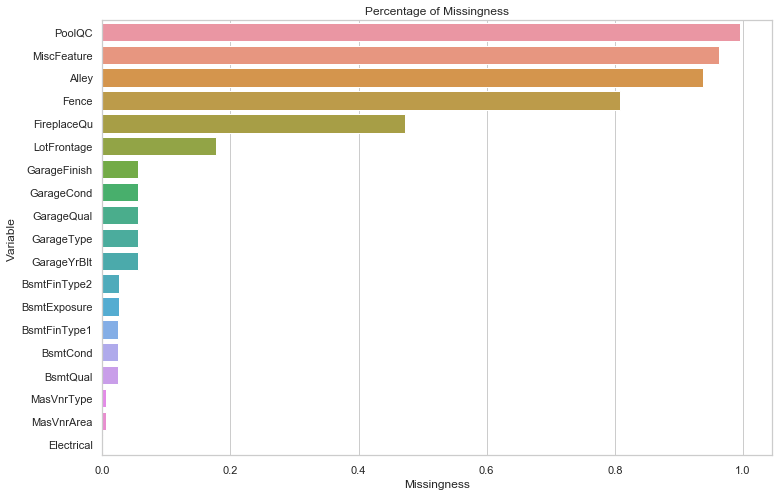

In [20]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,8))
perc_bar = sns.barplot(y = 'Variable', x = 'Missingness', data = perc_missing, ax = ax)
perc_bar.set(title = 'Percentage of Missingness')

In [21]:
print('Number of variables having missing values is ' + str(len(perc_missing)))

Number of variables having missing values is 19


By looking at the barplot above, we decided to first drop the columns with greater than 40% missingness, the dropped columns are as follows. NAs mostly mean that the corresponding house doesn't have certain things, pools, fences for example. We may add those variables back for predicting those houses with higher values.

In [22]:
dropped_columns = perc_missing[perc_missing.Missingness > 0.4].Variable.values
dropped_columns

array(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],
      dtype=object)

Other check for missingness, the following function checks None, negatives or empty strings

In [23]:
def data_eval(df):
    for i in range(len(df.columns)):
        print('-'*50)
        print('Column Name: ', df.columns[i])
        if (df[df.columns[i]].dtypes == 'float64' or df[df.columns[i]].dtypes == 'int64') and \
        df[df.columns[i]][df[df.columns[i]]<0].count()>0:
            print('Number of negatives: ', df[df.columns[i]][df[df.columns[i]]<0].count())
        if df[df.columns[i]][df[df.columns[i]]=='None'].count() > 0:
            print('Number of None strings: ', df[df.columns[i]][df[df.columns[i]]=='None'].count())
        if df[df.columns[i]][df[df.columns[i]]==''].count() > 0:
            print('Number of empty strings: ', df[df.columns[i]][df[df.columns[i]]==''].count())
        else:
            print('Column ' + df.columns[i] + ' has no negatives, empty strings or Nones')

In [24]:
# data_eval(df_train) # It turns out that the dataframe is quite clean, with none of those

In [25]:
# helper function to obtain the number of missing values for each row
def row_na_list(df, value):
    l=[]
    for i in range(len(df.index)) :
        if df.iloc[i].isnull().sum() > value:
            l.append([i, df.iloc[i].isnull().sum()])
    return l

# value=10
# row_na = row_na_list(df_train,value)
# print('Number of Rows with missingness greater than ' + str(value) + ': ' + str(len(row_na)))
# print('Minimum percentage missingness: ', 100*(value+1)/len(df_train.columns))
# for i in range(len(row_na)):
#     print('-'*50)
#     print('Row ' + str(row_na[i][0]) + ' with ' +str(100*row_na[i][1]/len(df_train.columns)) 
#           + ' percent missingness')
#     print('Number of missing entries in row: ', row_na[i][1])

[Back To Top](#top)

<a id='Inbalance'></a>
### 1.2 Inbalances

We noticed that for some variables, if we do a value count, one single value accounts for more than 80% of all the values, we decided to remove those variables for now as they don't add much information to the regression. In the later stage of the project, we will consider them case by case if we need to add them back to the model.

In [82]:
def inbalance_check(df, value):
    inbalance_columns = []
    for i in range(df.shape[1]):
        if df[df.columns[i]].value_counts(normalize = True).values[0] > value:
            inbalance_columns.append(df.columns[i])
    return inbalance_columns

In [85]:
inbalance_columns = inbalance_check(df_train, 0.8)
print(inbalance_columns)

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition']


[Back To Top](#top)

<a id='Correlation'></a>

### 1.3 Correlation Check

In [86]:
# Output a big correlation table

# df_train.corr()

In [96]:
# helper function searching for high correlation paris
def index_retrieve(df, value, measure):
    ''' Get index positions of value in dataframe.'''

    poslist = list()
    # Get bool dataframe with True at positions where the given value exists and filter out on-diagonal elements
    if measure == 'spearman':
        if value>0:
            result = df.corr(method = measure)[df.corr(method = measure)!=1]\
            [df.corr(method = measure)>value].isna().isin([value])
        elif value<0:
            result = df.corr(method = measure)[df.corr(method = measure)!=1]\
            [df.corr(method = measure)<value].isna().isin([value])
        else:
            pass
    elif measure == 'pearson':
        if value>0:
            result = df.corr(method = measure)[df.corr(method = measure)!=1]\
            [df.corr(method = measure)>value].isna().isin([value])
        elif value<0:
            result = df.corr(method = measure)[df.corr(method = measure)!=1]\
            [df.corr(method = measure)<value].isna().isin([value])
        else:
            pass
    # Get list of columns that contains the value
    series = result.any()
    columnNames = list(series[series == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            poslist.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    
    if value > 0:
        print('Number of correlations with value greater than ' + str(value) + ': ' + str(len(poslist)))
    if value < 0:
        print('Number of correlations with value less than ' + str(value) + ': ' + str(len(poslist)))
    else:
        pass
    for i in range(len(poslist)):
        print('-'*40)
        print('index labels: ', poslist[i][0], poslist[i][1])
        print('value at index: ', df.corr().loc[poslist[i]])
    
    return poslist

In [89]:
sig_cor_index_list = index_retrieve(df_train, 0.7, 'spearman')

Number of correlations with value greater than 0.7: 14
----------------------------------------
index labels:  SalePrice OverallQual
value at index:  0.7909816005838047
----------------------------------------
index labels:  GarageYrBlt YearBuilt
value at index:  0.8256674841743434
----------------------------------------
index labels:  GarageYrBlt YearRemodAdd
value at index:  0.6422767797035414
----------------------------------------
index labels:  1stFlrSF TotalBsmtSF
value at index:  0.8195299750050355
----------------------------------------
index labels:  TotalBsmtSF 1stFlrSF
value at index:  0.8195299750050355
----------------------------------------
index labels:  TotRmsAbvGrd GrLivArea
value at index:  0.8254893743088377
----------------------------------------
index labels:  SalePrice GrLivArea
value at index:  0.7086244776126511
----------------------------------------
index labels:  GrLivArea TotRmsAbvGrd
value at index:  0.8254893743088377
--------------------------------

In [95]:
# spearman
print('top 10 Spearman correlation coefficient')
print(df_train.corr(method='spearman').SalePrice.sort_values(ascending=False).head(10))
print('-'*55)
# pearson
print('top 10 Pearson correlation coefficient')
print(df_train.corr().SalePrice.sort_values(ascending=False).head(10))

top 10 Spearman correlation coefficient
SalePrice      1.000000
OverallQual    0.809829
GrLivArea      0.731310
GarageCars     0.690711
YearBuilt      0.652682
GarageArea     0.649379
FullBath       0.635957
TotalBsmtSF    0.602725
GarageYrBlt    0.593788
1stFlrSF       0.575408
Name: SalePrice, dtype: float64
-------------------------------------------------------
top 10 Pearson correlation coefficient
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


[Back To Top](#top)